# Challenge 3

In [2]:
# import libraries here
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
sns.set(style="darkgrid")

#### Import the titanic file. Name your dataset `titanic`.

In [3]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [4]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [14]:
# your code here- numerical variable
titanic.select_dtypes(include=['float64','int64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [30]:
#your code here- categorical variable
titanic.select_dtypes(include=['object','int'])

,PassengerId,Pclass,Name,Gender,SibSp,Parch,Ticket,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,U0,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,U0,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C123,S
4,5,3,"Allen, Mr. William Henry",male,0,0,373450,U0,S
...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,U0,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,U0,S
1307,1308,3,"Ware, Mr. Frederick",male,0,0,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [ ]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12,6))

#### Use the appropriate visulalization to show the distribution of the column `Age`

(array([ 85., 162., 475., 303., 170.,  73.,  35.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

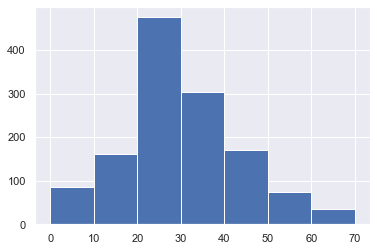

In [24]:
# your code here
plt.hist(titanic['Age'], bins=range(0,int(titanic['Age'].max()),10))

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <a list of 50 Patch objects>)

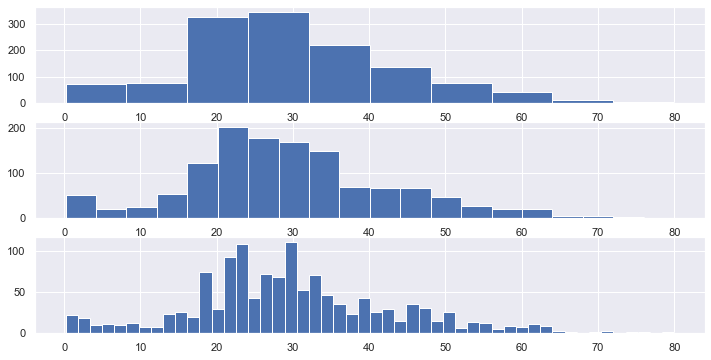

In [27]:
# your code here
fig,axs = plt.subplots(nrows=3, ncols=1, figsize=(12,6))

axs[0].hist(titanic['Age'], bins=10)

axs[1].hist(titanic['Age'], bins=20)

axs[2].hist(titanic['Age'], bins=50)

#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here
# --> The bin size makes x axis more granular o less depending on the value. 
#     Higher value means more sections and more granularity

#### Use seaborn to show the distribution of the column `Age`

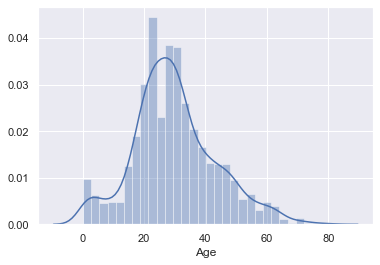

In [31]:
# your code here
sns.distplot(titanic["Age"])

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


(-1.1087172584473963,
 1.115396545532452,
 -1.1129882387529657,
 1.100618487559665)

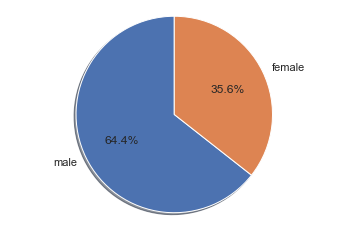

In [56]:
# your code here- 1st way
gen = titanic.groupby(['Gender']).agg({'Embarked': 'count'})
male = gen.iloc[1]
female = gen.iloc[0]
sizes= [male, female]
labels = ['male', 'female']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')


[Text(0, 0, 'male'), Text(0, 0, 'female')]

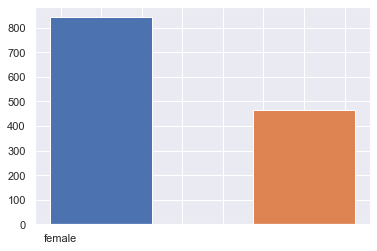

In [82]:
# your code here- 2nd way
fig, ax = plt.subplots()
width = 0.5
rects1 = ax.bar(1,male,width, label='Men')
rects2 = ax.bar(2,female,width, label='Women')
labels = ['male', 'female']

ax.set_xticklabels(labels=labels) # --> ¿Porque me sale uno enciam ade otro? ¿Como lo puedo evitar?

#### Use the appropriate plot to visualize the column `Pclass` 


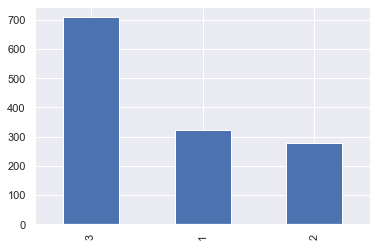

In [85]:
# your code here
pclass = titanic['Pclass'].value_counts()
pclass.plot.bar()

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

In [88]:
# your code here
age = titanic.describe().Age


count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

Text(0, 0.5, 'Age')

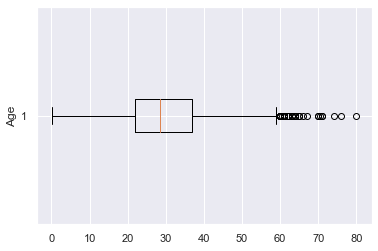

In [96]:
plt.boxplot(titanic["Age"],vert=False)
plt.ylabel('Age')

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here
# --> The age is quite concentrate between 20 to 40 and there is a few people over 60 years

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

Text(0, 0.5, 'Age')

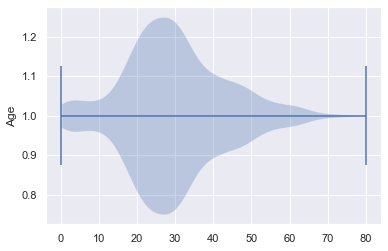

In [99]:
#your code here
plt.violinplot(titanic["Age"],vert=False)
plt.ylabel('Age')

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here
# --> There is a lot of young people

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

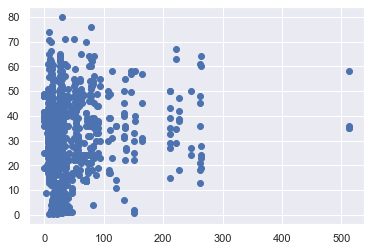

In [101]:
#your code-1st way
plt.scatter(titanic['Fare'], titanic['Age'])

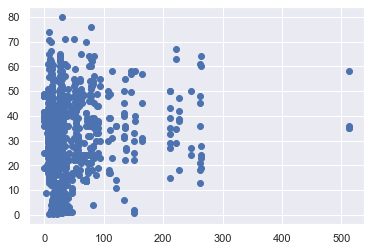

In [105]:
plt.plot(titanic['Fare'], titanic['Age'],'o')

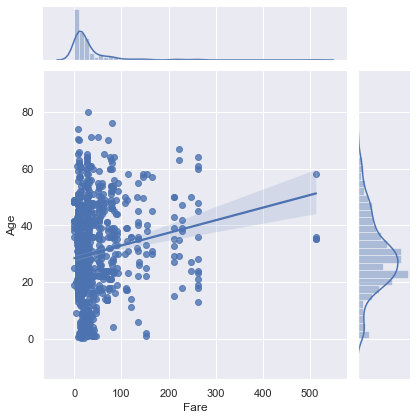

In [106]:
# your code-2nd way
sns.jointplot("Fare","Age", data=titanic, kind="reg")

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

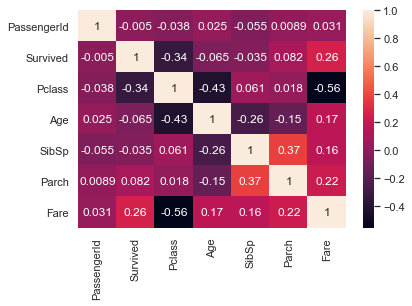

In [110]:
#your code here
corr = titanic.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
# --> SibSp and Parch

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

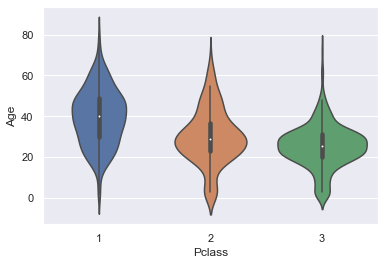

In [115]:
#your code here
sns.violinplot(x="Pclass", y='Age', data=titanic)


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

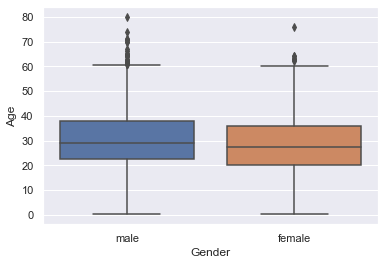

In [120]:
#your code here
sns.boxplot(x="Gender", y='Age', data=titanic)